<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA015/blob/main/IAA015_T%C3%B3picos_em_Intelig%C3%AAncia_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import random


##Função a ser usada no exemplo

In [16]:
def f(x):
   return 3*x**2 - 2*x + 5

Função bit to Vector

In [17]:
def bit2vet(valor):
  res = [];
  for i in range(0,32):
    if valor & (0x01<<i) > 0:
      res.insert(0,1);
    else:
      res.insert(0,0);
  return res;


Função bin to Number

In [18]:
def bin2num(vet):
  num = 0;
  if vet[0] == 1:
    # num negativos
    for i in range(1,32):
      if vet[i]==0:
        num = num + 2**(31-i);
    num = -1 - num;
  else:
    for i in range(1,32):
      if vet[i]>0:
        num = num + 2**(31-i);
  return num;

População inicial

In [19]:
#
#  Passo 1 do AG, cria a populacao inicial
#
def populacaoInicial(tamanho):
    resultado = [];
    for x in range(tamanho):
        resultado.append( random.randrange(-10,10) );
    return resultado;

Avaliação (fit)

In [20]:
def avaliacao(populacao):
  fit = []
  for v in populacao:
    fx = v*v-3*v+4
    if fx == 0:
      fit.append( 999999 )
    else:
      fit.append( abs(1/fx) );
  return fit;

Preserva Melhor

In [21]:
def preservaMelhor(geracao,nova):
  ava = avaliacao(geracao)
  maior = 0;
  for i in range(1,len(ava)):
    #print(f'comparando {maior} ({geracao[maior]} : {ava[maior]}) com {i} ({geracao[i]} :{ava[i]}) ')
    if ava[maior] < ava[i]:
      maior = i
  nova.append( geracao[maior] )
  #print('melhor: ', nova, geracao[maior])
  return geracao[maior]

Cruzamento

In [22]:
def cruzamento(pop, qdade, nova):
  qdeSaida = len(nova) + qdade
  while len(nova)<qdeSaida:
    indA = random.randrange(0,len(pop));
    indB = indA;
    while indA==indB:
      indB = random.randrange(0,len(pop));
    # adapta a escala de valores de -10:10 para 0:20
    p1 = pop[indA]+10
    p2 =  pop[indB]+10
    v1 = bit2vet( p1 );
    v2 = bit2vet( p2 );
    corte = random.randrange(28,31);
    novoV1 =  v1[0:corte];
    novoV1.extend( v2[corte:] );
    novoV2 =  v2[0:corte];
    novoV2.extend( v1[corte:] );
    # print( 'saida 1 (v1,corte,v2) ',v1[0:corte], v2[corte:])
    # print( 'saida 2 (v2,corte,v1) ',v2[0:corte], v1[corte:])
    v1num = bin2num(novoV1)-10;
    if v1num >= -10 and v1num<= 10:
      nova.append( v1num );
    if len(nova)<qdeSaida:
      v2num = bin2num(novoV2)-10;
      if v2num >= -10 and v2num<= 10:
        nova.append( v2num );


Mutação

In [23]:
def mutacao(pop, qdade, novo):
  qdeSaida = len(nova) + qdade
  while len(nova)<qdeSaida:
    indA = random.randrange(0,len(pop));
    p1 = pop[indA]+10
    v1 = bit2vet( p1 );
    pos = random.randrange(27,32);
    if v1[pos] == 0:
      v1[pos] = 1;
    else:
      v1[pos] = 0;
    v1num = bin2num(v1)-10;
    if v1num>=-10 and v1num<=10:
      novo.append( v1num );


##Visualizando a função

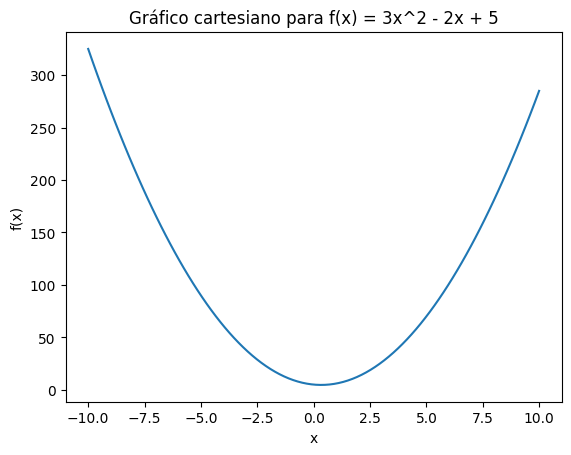

In [24]:
x_values = np.linspace(-10, 10, 100)
y_values = f(x_values)
plt.plot(x_values, y_values)
plt.title("Gráfico cartesiano para f(x) = 3x^2 - 2x + 5")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


Executando o Algoritmo Genético

In [25]:
# passo 1
p0 = populacaoInicial(5);
print("Pop inicial: ",end='');
print(p0);
# avalia a pop. inicial
a0 = avaliacao(p0);
#print(p0);
print(a0)

# fazemos a iteração, passos 3,4 e 5 do AG
geracao = p0;
numGeracoes = 5;
while numGeracoes>0:
  nova = [];
  preservaMelhor(geracao,nova);
  cruzamento(geracao, 3, nova);
  mutacao(geracao, 1, nova);
  numGeracoes=numGeracoes-1;
  av = avaliacao(nova);
  # ordena a geracao com base na avaliacao
  nova2 = sorted(zip(av,nova),reverse=True)
  geracao = [x for _,x in nova2]
  print( f'Geracao {numGeracoes} pop= {geracao}')

print(f'A melhor solucao encontrada: {geracao[0]}')


Pop inicial: [-2, -4, -9, -6, -4]
[0.07142857142857142, 0.03125, 0.008928571428571428, 0.017241379310344827, 0.03125]
Geracao 4 pop= [-1, -2, -2, -4, -6]
Geracao 3 pop= [2, 2, -1, -2, -6]
Geracao 2 pop= [2, 2, -2, -2, -6]
Geracao 1 pop= [2, 2, -4, -6, -6]
Geracao 0 pop= [2, -4, -4, -6, -8]
A melhor solucao encontrada: 2
